In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/hearing_test.csv')

In [3]:
df

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1
...,...,...,...
4995,73.0,3.9,0
4996,57.0,33.9,1
4997,49.0,34.5,1
4998,38.0,46.4,1


In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [6]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

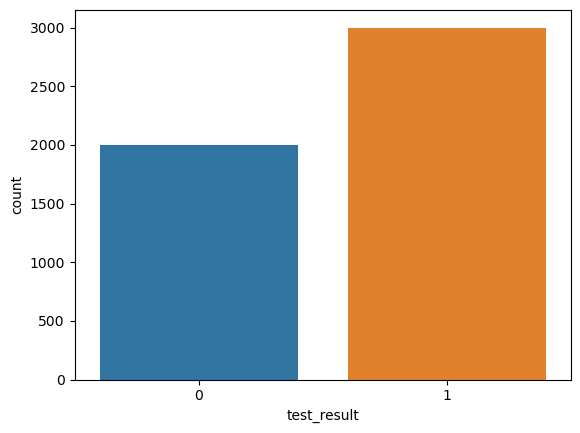

In [8]:
sns.countplot(x='test_result',data= df)

# EDA?

<Axes: xlabel='age', ylabel='test_result'>

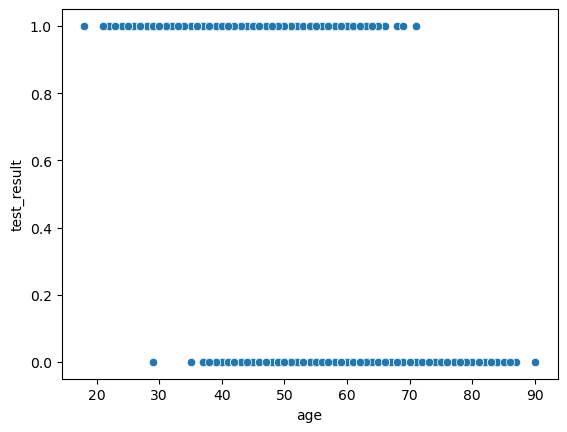

In [9]:
sns.scatterplot(data=df,x='age',y='test_result')

<Axes: xlabel='test_result', ylabel='age'>

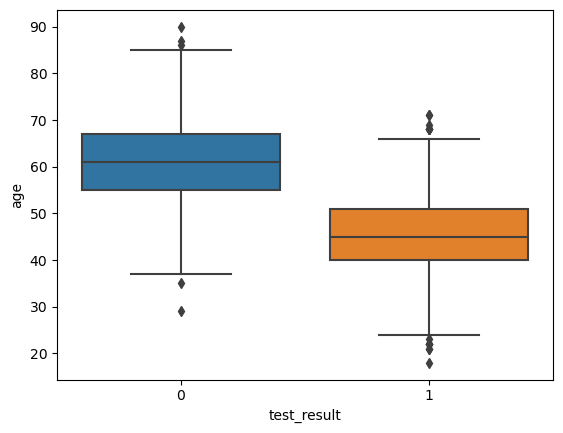

In [10]:
sns.boxplot(data=df,x='test_result',y='age')

In [11]:
X= df.drop('test_result',axis=1)
y= df['test_result']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
X_train

,age,physical_score
1233,46.0,37.8
1056,60.0,32.5
1686,45.0,42.6
187,79.0,26.8
3840,40.0,40.9
...,...,...
2895,52.0,40.5
2763,50.0,21.8
905,70.0,20.5
3980,57.0,35.2


In [14]:
scaler = StandardScaler()
X_train

,age,physical_score
1233,46.0,37.8
1056,60.0,32.5
1686,45.0,42.6
187,79.0,26.8
3840,40.0,40.9
...,...,...
2895,52.0,40.5
2763,50.0,21.8
905,70.0,20.5
3980,57.0,35.2


In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_train

array([[-0.50636652,  0.62556469],
       [ 0.73881527, -0.02262551],
       [-0.59530807,  1.21260487],
       ...,
       [ 1.62823084, -1.49022596],
       [ 0.4719906 ,  0.30758459],
       [ 0.38304905, -0.80534575]])

In [21]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

learning = log_reg.fit(scaled_X_train,y_train)

In [22]:
y_pred = learning.predict(scaled_X_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)


1.0

In [25]:
confusion_matrix(y_test,y_pred)

array([[360,   0],
       [  0, 640]], dtype=int64)